<a href="https://colab.research.google.com/github/vataliya/london_bike_rentals/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [ ]:
# Read the given CSV file, and view some sample records

data = pd.read_csv('london.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
#Determining the number of rows and columns
data.shape

(17414, 10)

In [ ]:
#summary of all the numeric columns in the dataset
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [ ]:
#Datatypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
#Checking missing values
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

data = data.set_index("timestamp")

data["hour"] = data.index.hour
data["day_of_month"] = data.index.day
data["day_of_week"]  = data.index.dayofweek
data["month"] = data.index.month
data["year"] = data.index.year

In [ ]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1,2015


In [ ]:
#Mapping variables season, month, weathersit, weekday

data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data['month']=data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['weather_code']=data.weather_code.map({
    1 : 'Clear' ,
    2 :' Scattered clouds' , 
    3 : 'Broken clouds' ,
    4 : 'Cloudy' ,
    7 : 'Light Rain' ,
    10 : 'Heavy Rain' , 
    26 : 'Snowfall' ,
    94 : 'Freezing Fog'})
data['day_of_week']=data.day_of_week.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,fall,0,4,Sat,Jan,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,fall,1,4,Sat,Jan,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,fall,2,4,Sat,Jan,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,fall,3,4,Sat,Jan,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,fall,4,4,Sat,Jan,2015


In [ ]:
data.nunique().sort_values()

is_holiday         2
is_weekend         2
season             3
year               3
weather_code       7
day_of_week        7
month             12
hour              24
day_of_month      31
t1                73
t2                82
wind_speed       103
hum              143
cnt             3781
dtype: int64

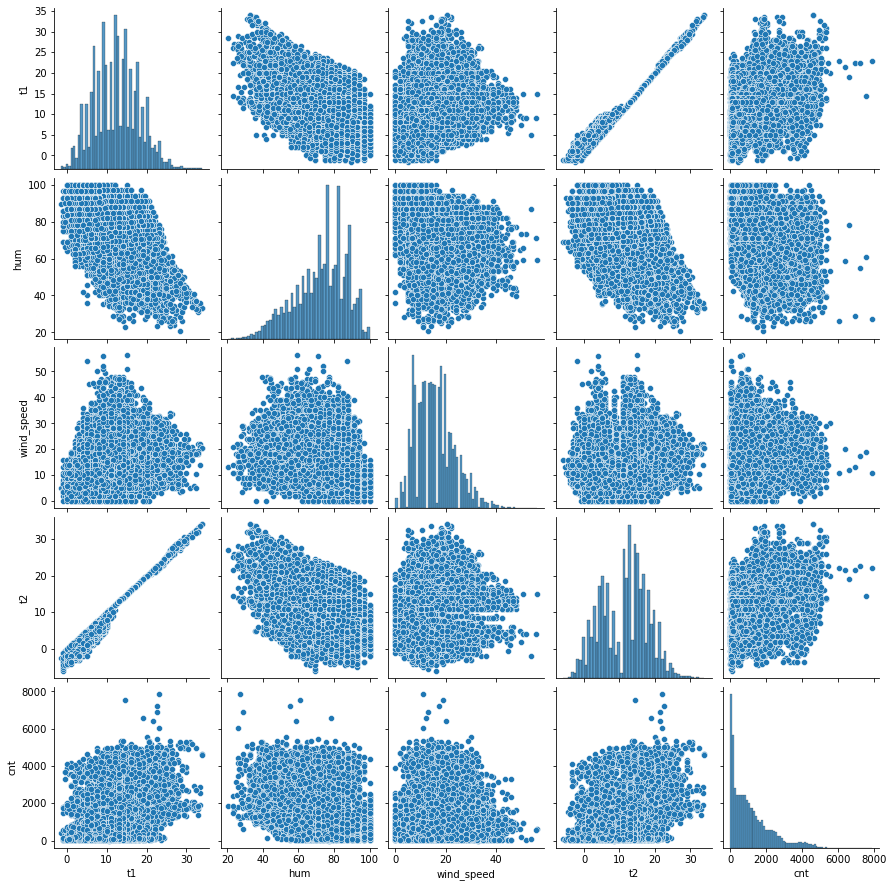

In [ ]:
#Pairplot for numeric variables
sns.pairplot(data, vars=["t1", "hum",'wind_speed','t2','cnt'])
plt.show()

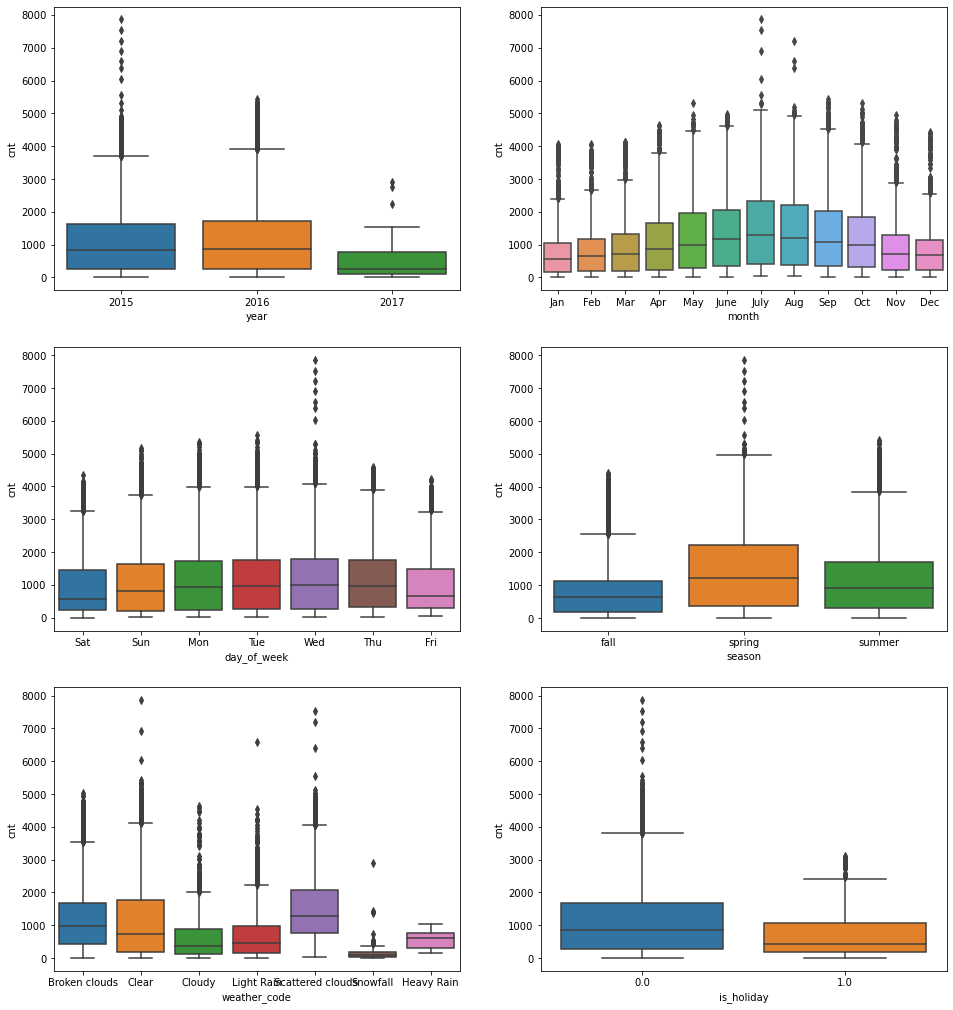

In [ ]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(16, 24))
plt.subplot(4,2,1)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'is_holiday', y = 'cnt', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'weather_code', y = 'cnt', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'day_of_week', y = 'cnt', data = data)
plt.show()

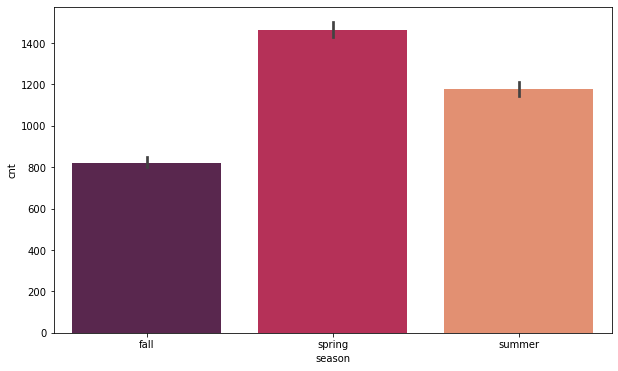

In [ ]:
#Barplot to see relation between season and count of bike rentals
plt.figure(figsize=(10,6))
sns.barplot('season','cnt',data=data,palette="rocket",)
plt.show()


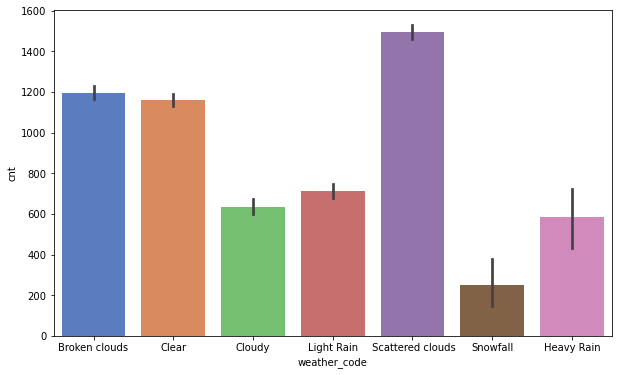

In [ ]:
#Relation between weather and count of bike rentals
plt.figure(figsize=(10,6))
sns.barplot('weather_code','cnt',palette="muted",data=data)
plt.show()
           

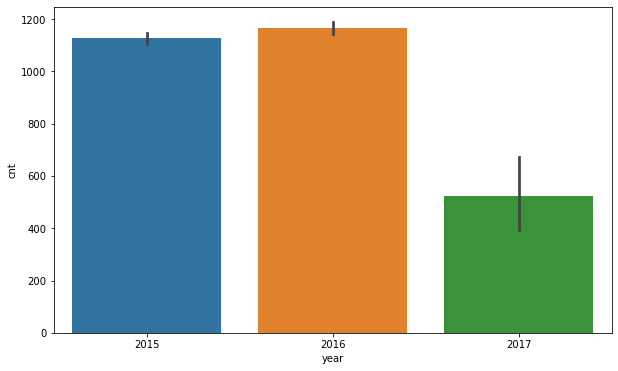

In [ ]:
#Relation between Year and count of bike rentals
plt.figure(figsize=(10,6))
sns.barplot('year','cnt',data=data)
plt.show()

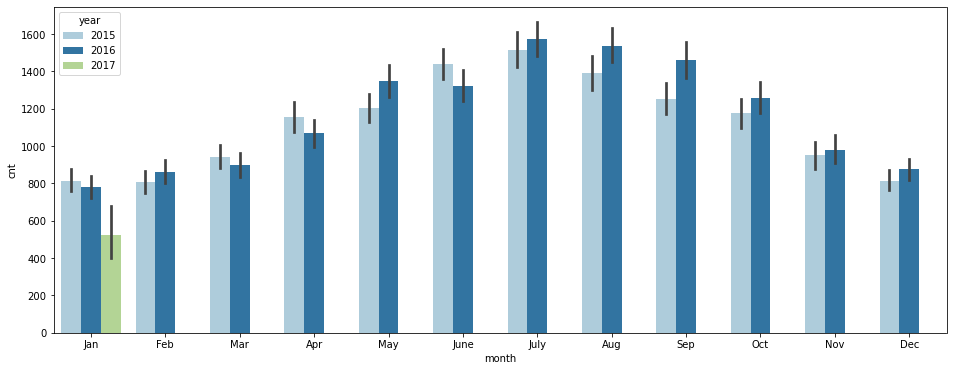

In [ ]:
#Relation between month and 
plt.figure(figsize=(16,6))
sns.barplot('month','cnt',hue='year',data=data,palette='Paired')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

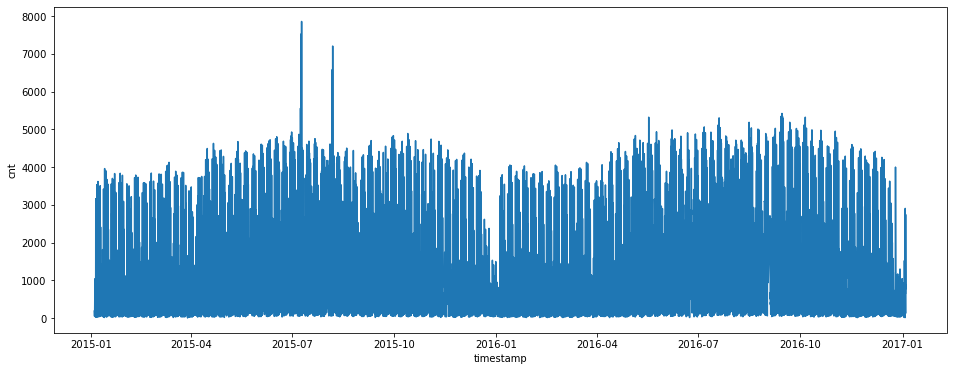

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data,x=data.index,y=data.cnt)
# plt.xticks(rotation=90)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

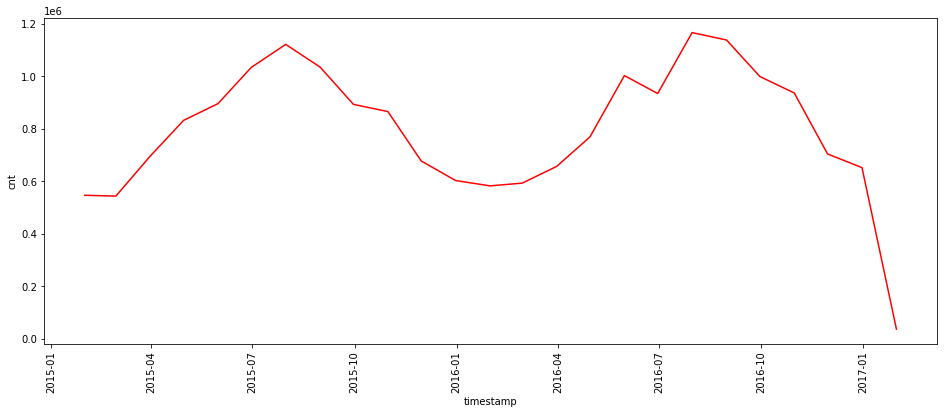

In [ ]:
df_by_month = data.resample("M").sum()

plt.figure(figsize=(16,6))
sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.cnt,color="red")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

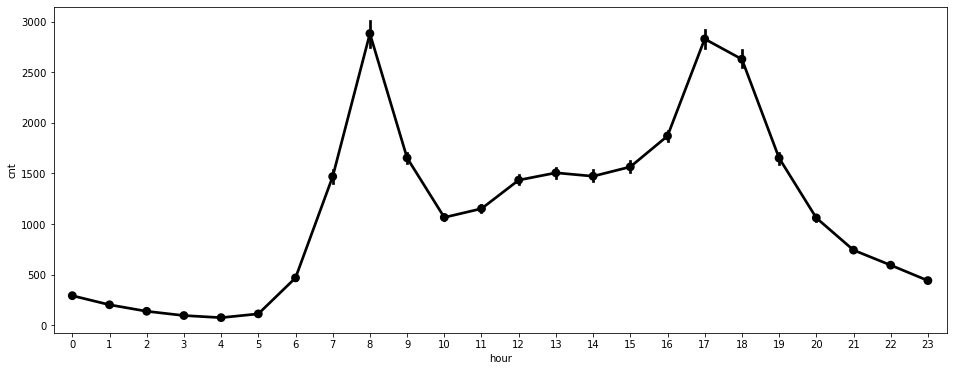

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.hour,y=data.cnt,color="black")

<AxesSubplot:xlabel='month', ylabel='cnt'>

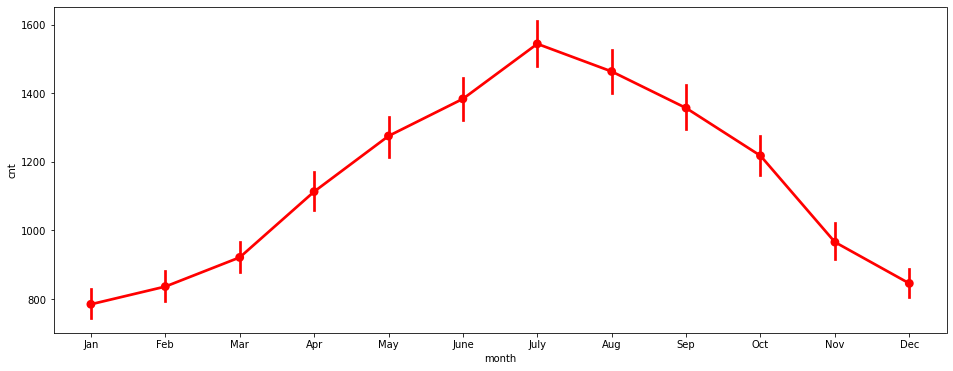

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.month,y=data.cnt,color="red")

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

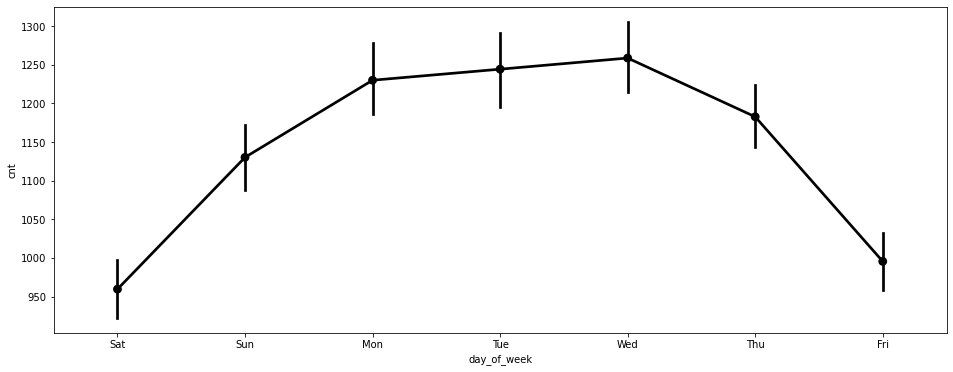

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.day_of_week,y=data.cnt,color="black")

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

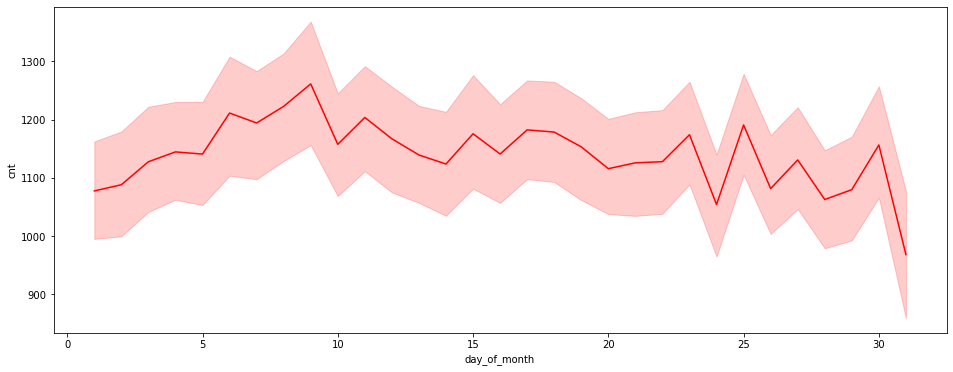

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data,x=data.day_of_month,y=data.cnt,color="r")

<AxesSubplot:xlabel='hour', ylabel='cnt'>

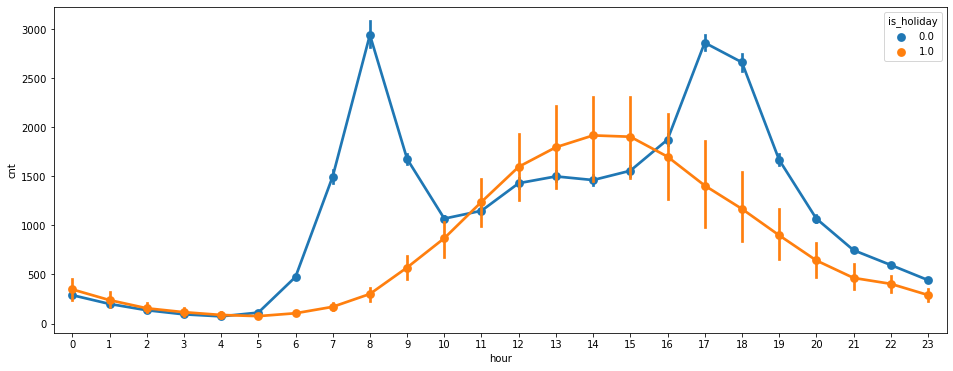

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.hour,y=data.cnt,hue=data.is_holiday)

<AxesSubplot:xlabel='month', ylabel='cnt'>

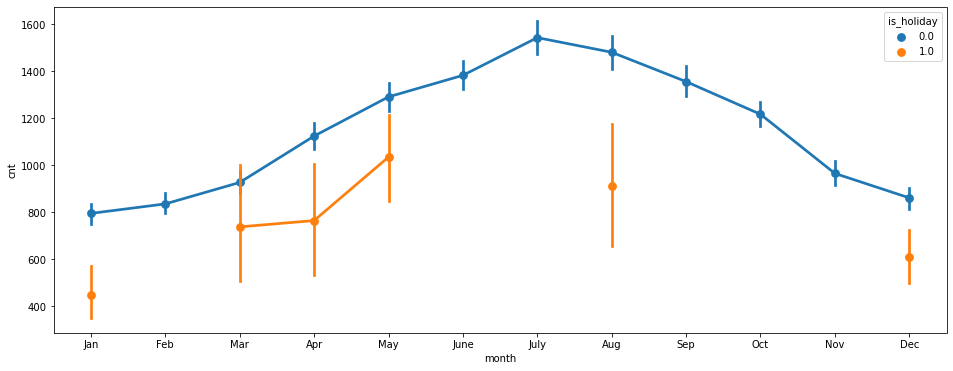

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.month,y=data.cnt,hue=data.is_holiday)

<AxesSubplot:xlabel='month', ylabel='cnt'>

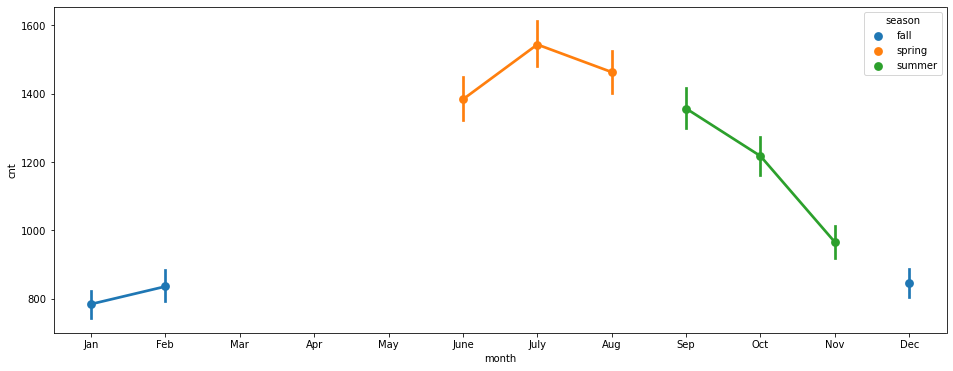

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,hue=data.season,y=data.cnt,x=data.month)

<AxesSubplot:xlabel='season', ylabel='count'>

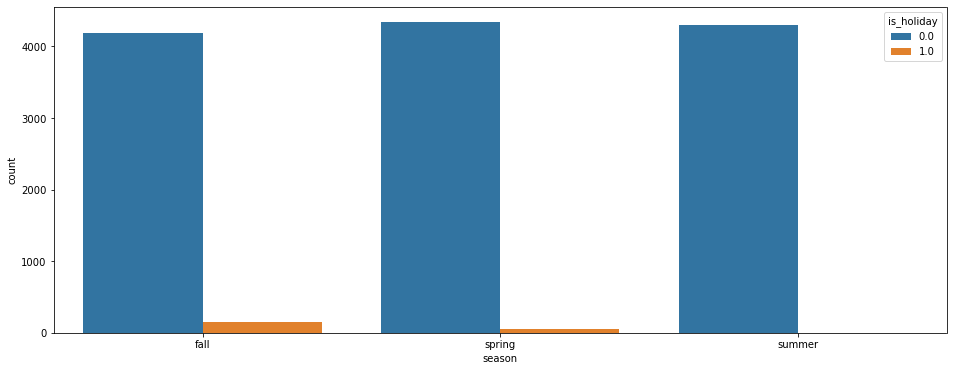

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,hue=data.is_holiday,x=data.season)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]),
 [Text(0, 0, '20.5'),
  Text(1, 0, '23.0'),
  Text(2, 0, '23.5'),
  Text(3, 0, '24.0'),
  Text(4, 0, '25.0'),
  Text(5, 0, '25.5'),
  Text(6, 0, '26.0'),
  Text(7, 0, '26.5'),
  Text(8, 0, '27.0'

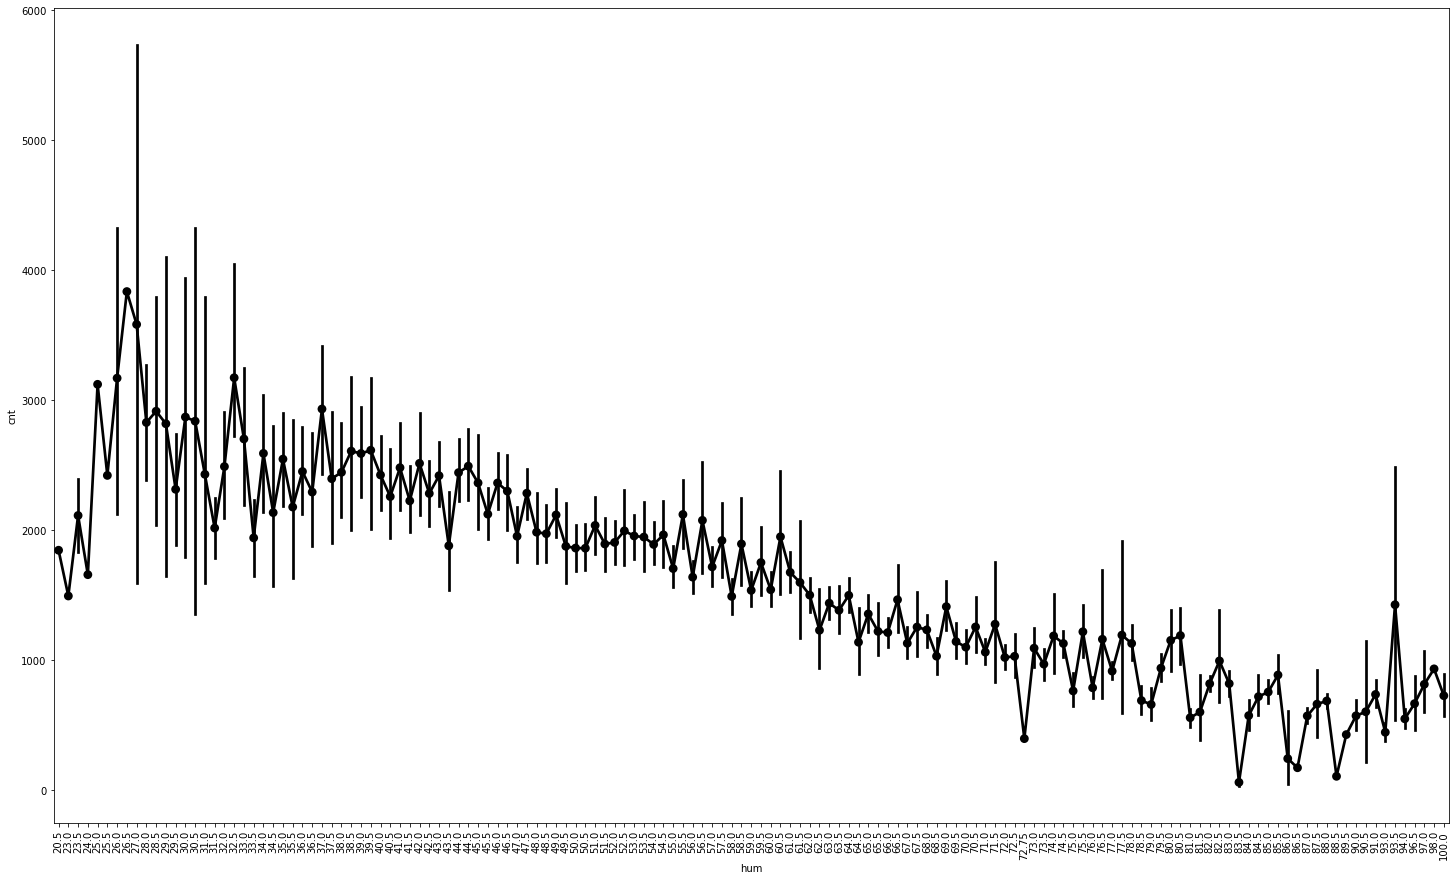

In [ ]:
plt.figure(figsize=(25,15))
sns.pointplot(data=data,x=data.hum,y=data.cnt,color="black")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.6666666666666665'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.5'),
  Text(6, 0, '4.0'),
  Text(7, 0, '4.5'),
  Text(8, 0, '5.0'),
  Text(9, 0, '5.5'),
  Text(10, 0, '6.0'),
  Text(11, 0, '6.5'),
  Text(12, 0, '7.0'),
  Text(13, 0, '7.5'),
  Text(14, 0, '8.0'),
  Text(15, 0, '8.5'),
  Text(16, 0, '9.0'),
  Text(17, 0, '9.5'),
  Text(18, 0, '10.

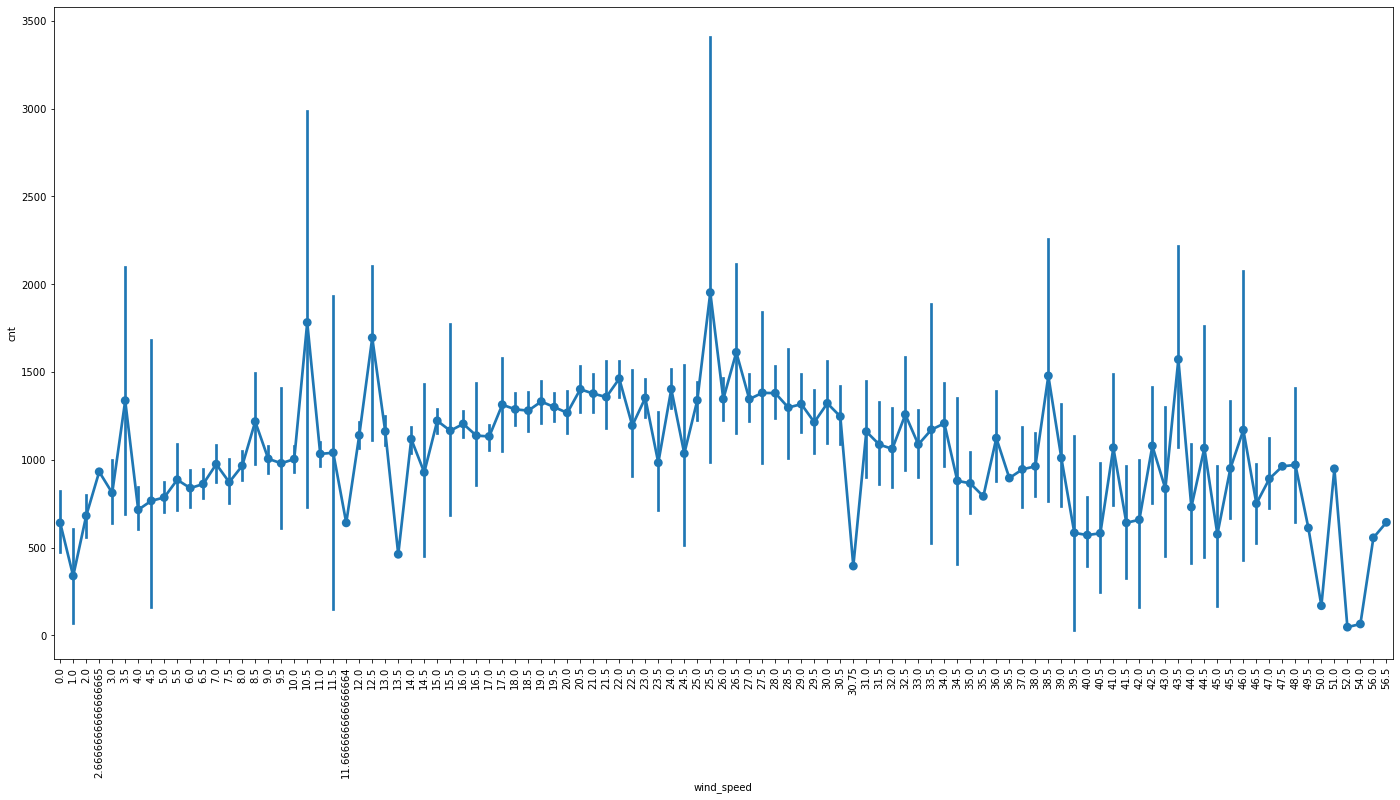

In [ ]:
plt.figure(figsize=(24,12))
sns.pointplot(data=data,x=data.wind_speed,y=data.cnt)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Broken clouds'),
  Text(1, 0, 'Clear'),
  Text(2, 0, 'Cloudy'),
  Text(3, 0, 'Light Rain'),
  Text(4, 0, ' Scattered clouds'),
  Text(5, 0, 'Snowfall'),
  Text(6, 0, 'Heavy Rain')])

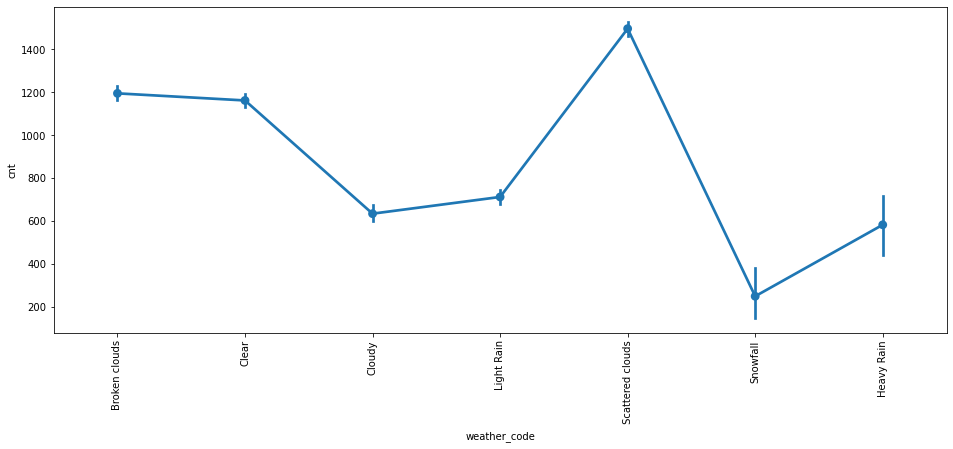

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(data=data,x=data.weather_code,y=data.cnt)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

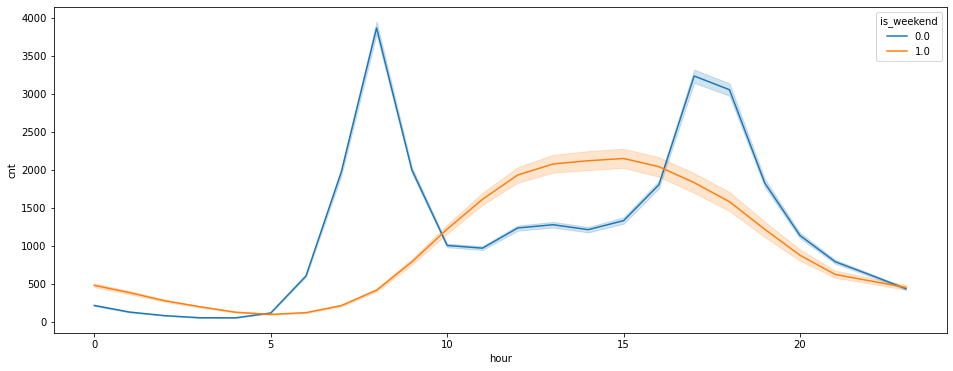

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x=data.hour,y=data.cnt,data=data,hue=data.is_weekend)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

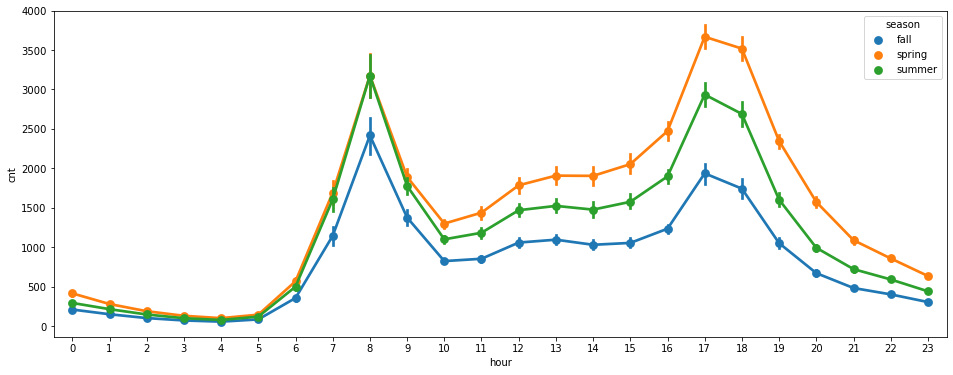

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x=data.hour,y=data.cnt,data=data,hue=data.season)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

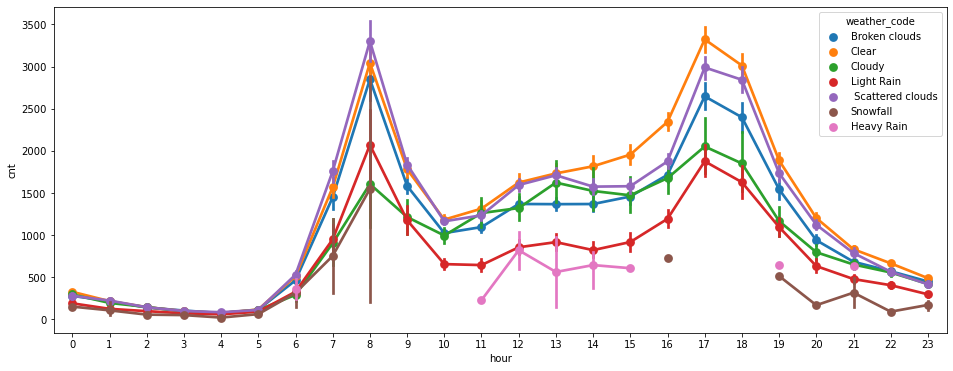

In [ ]:
plt.figure(figsize=(16,6))
sns.pointplot(x=data.hour,y=data.cnt,data=data,hue=data.weather_code)

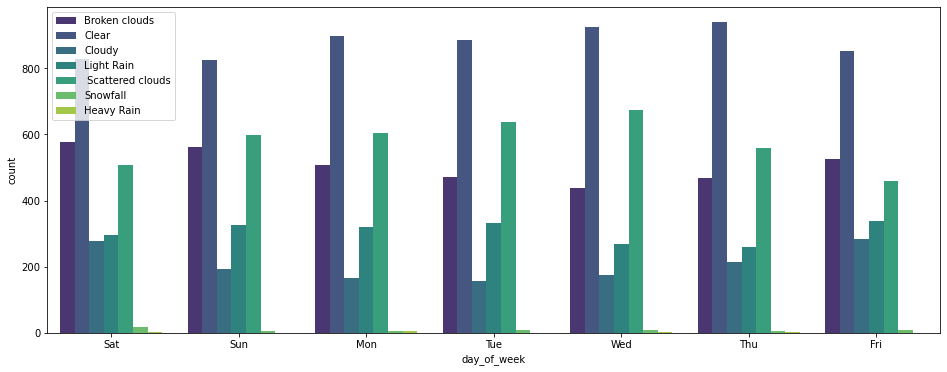

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,x=data.day_of_week,hue=data.weather_code,palette="viridis")
plt.legend(loc="best")

<AxesSubplot:xlabel='hour', ylabel='cnt'>

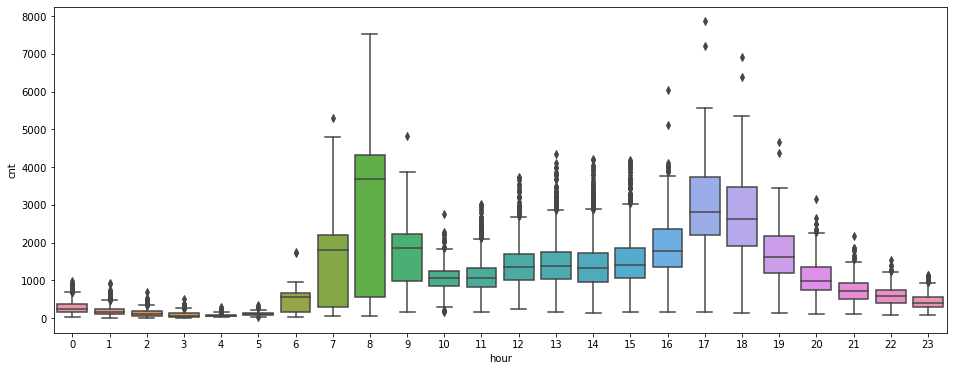

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["hour"],y=data.cnt)

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

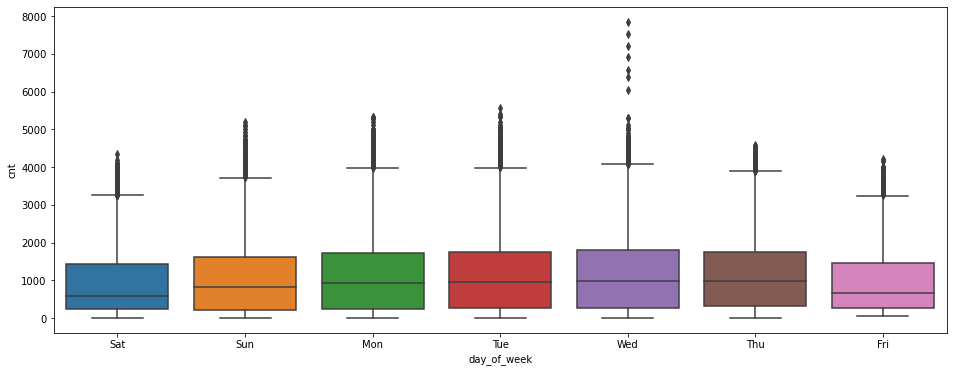

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["day_of_week"],y=data.cnt)

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

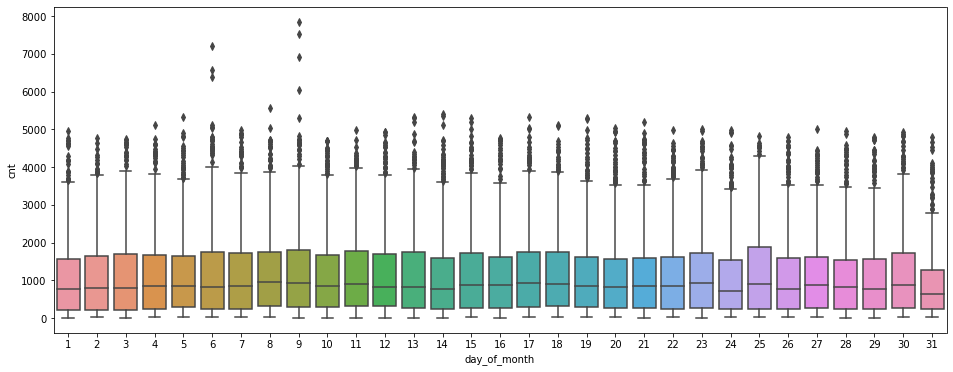

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["day_of_month"],y=data.cnt)

<AxesSubplot:xlabel='month', ylabel='cnt'>

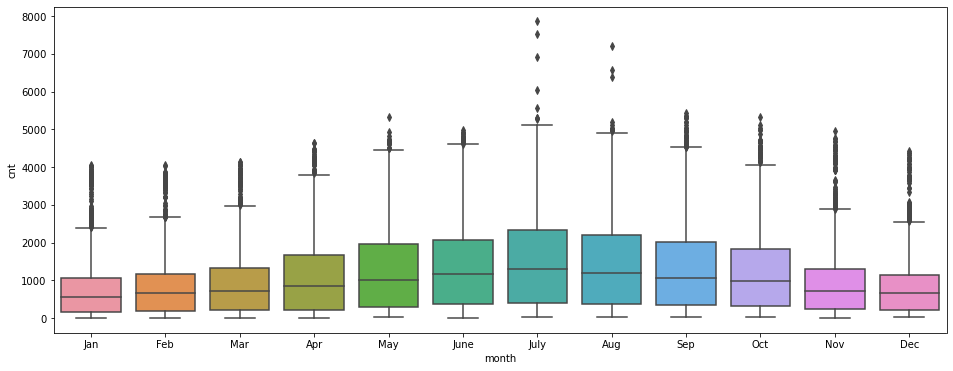

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["month"],y=data.cnt)

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

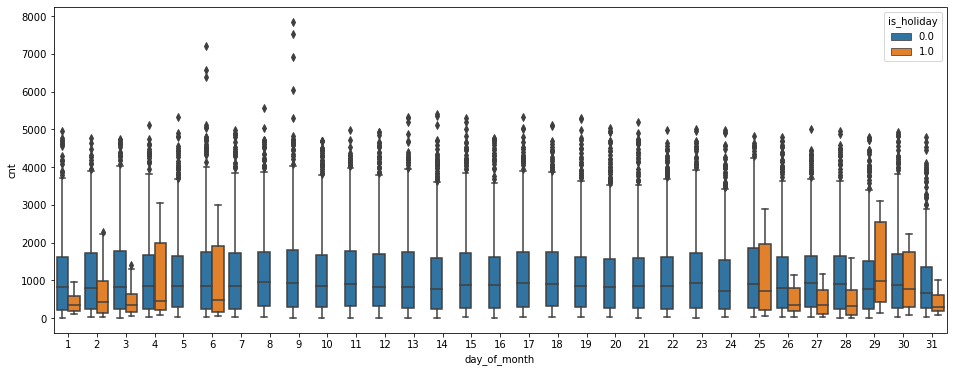

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data,x=data["day_of_month"],y=data.cnt,hue=data["is_holiday"])